# Análisis exploratorio en base a la metodología CRISP DM

## Paso 1 Comprensión del Negocio

### Contexto del Proyecto

En este proyecto, el objetivo principal es explorar cómo el clima puede influir en las actividades agrícolas. Esto se refiere a cómo las condiciones meteorológicas, como la temperatura, la humedad, la precipitación, entre otros, afectan el crecimiento de los cultivos y las decisiones de los agricultores. En particular, la variable de interés es la predicción de si lloverá o no al día siguiente, lo cual puede ser crucial para los agricultores en términos de planificación de actividades como riego, cosecha o protección de cultivos.

### Objetivos del Análisis

- Explorar el conjunto de datos y realizar un Análisis Exploratorio de Datos  para comprender las variables disponibles y su distribución.
- Desarrollar un modelo predictivo que permita prever si lloverá al día siguiente basándose en los datos actuales de clima.
- Identificar las variables más relevantes para la predicción de lluvia, para poder centrarse en las más importantes y descartar aquellas que no aporten valor al modelo.


### KPI DEL PROYECTO

**Para evaluar el impacto y la utilidad de este análisis, se definen los siguientes indicadores clave de desempeño (KPIs)**:

- Precisión del modelo de predicción de lluvia (% de aciertos en la clasificación de "Lloverá mañana").

- Reducción en el desperdicio de agua (% de disminución en riegos innecesarios debido a predicciones acertadas).

- Impacto en la producción agrícola (incremento en el rendimiento de cultivos gracias a una mejor planificación climática).

### Impacto esperado

- El análisis de datos y los modelos predictivos podrían ayudar a los agricultores a optimizar sus actividades y mejorar la productividad agrícola.

- También podría apoyar en la toma de decisiones estratégicas, como cuándo sembrar o cuándo proteger los cultivos, basándose en las predicciones meteorológicas.

## Paso 2 Comprensión de los datos

In [1]:
import pandas as pd

# Path to the file inside the container
file_path = '/home/kedro_docker/data/01_raw/weatherAUS.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [2]:
# Mostrar las primeras filas del conjunto de datos
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
# Obtener información general sobre los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
# Estadísticas descriptivas de las variables numéricas
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [5]:
# Verificar los valores faltantes
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
# Cuantos registros hay por locación

df['Location'].value_counts()

Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

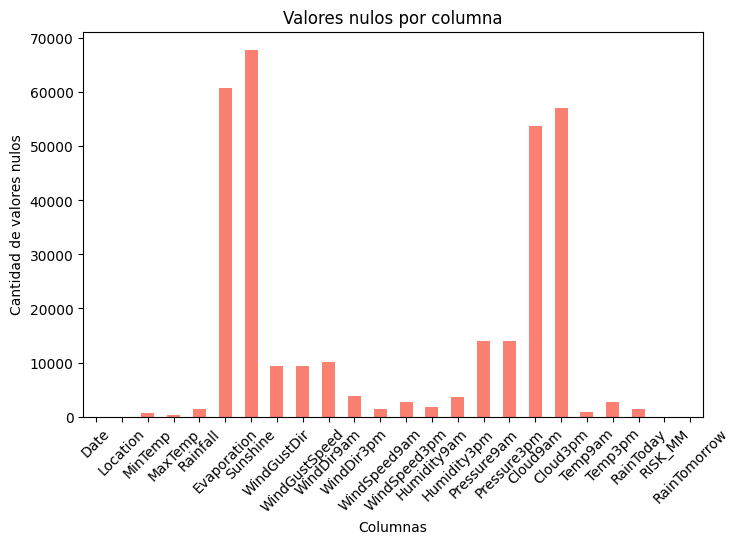

In [7]:
# Visualización de valores nulos
import matplotlib.pyplot as plt

cantidad_nulos = df.isnull().sum()

plt.figure(figsize=(8, 5))
cantidad_nulos.plot(kind='bar', color='salmon')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.title('Valores nulos por columna')
plt.xticks(rotation=45)
plt.show()

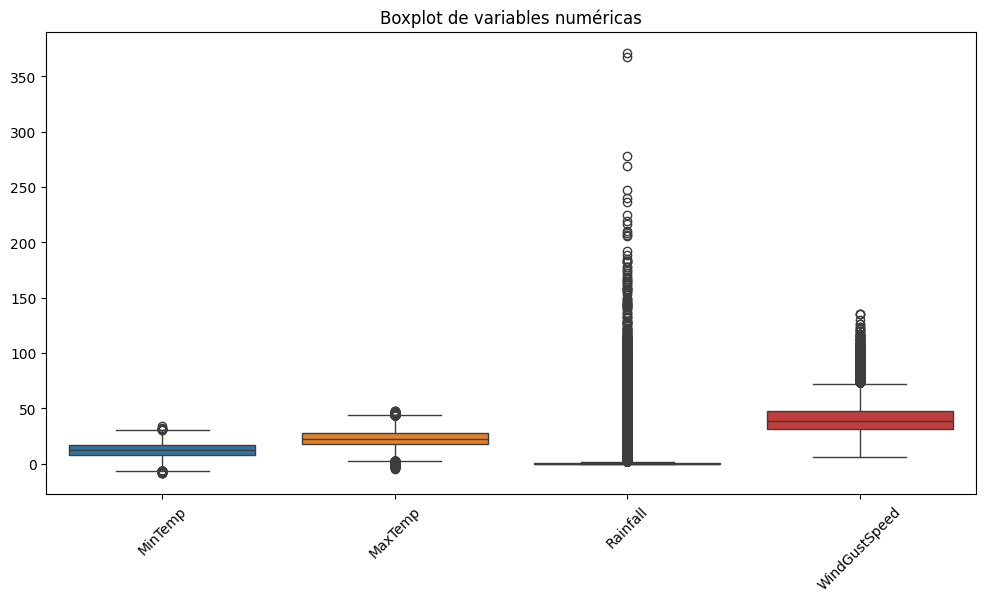

In [8]:
# Visualización de Outliers
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']])
plt.title("Boxplot de variables numéricas")
plt.xticks(rotation=45)
plt.show()

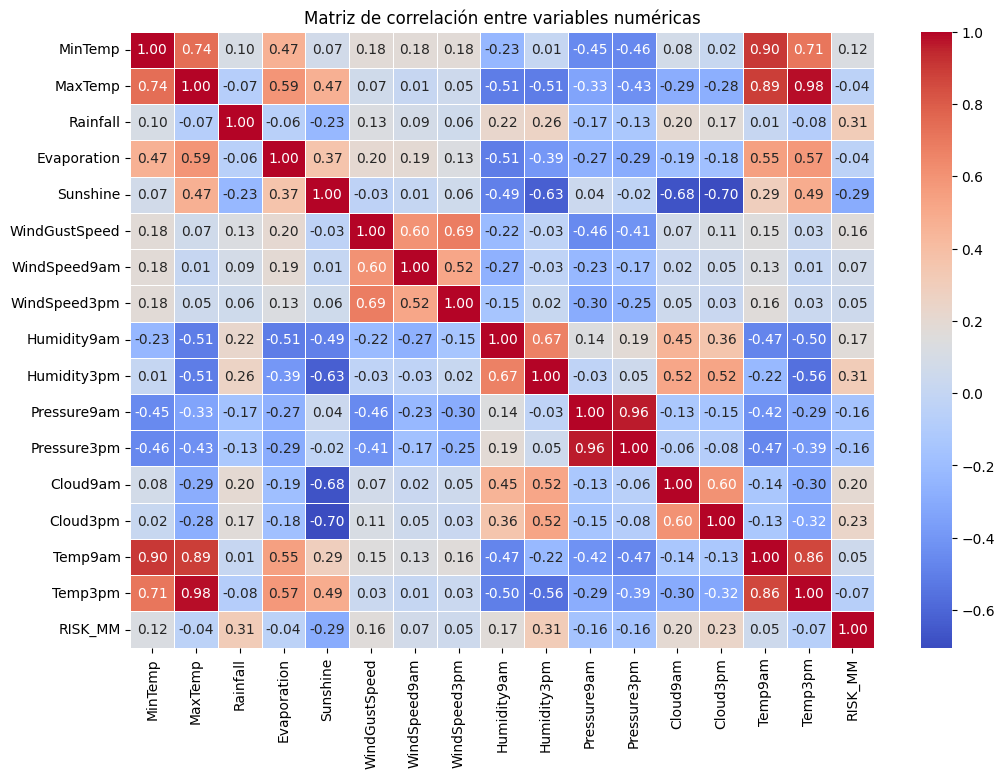

In [9]:
# Crear una copia del DataFrame original para trabajar sin modificarlo
df_temp = df.copy()

# Convertir "Date" a tipo datetime en la copia
df_temp["Date"] = pd.to_datetime(df_temp["Date"])

# Seleccionar solo las columnas numéricas en una nueva variable
df_numeric = df_temp.select_dtypes(include=["number"])

# Guardar la matriz de correlación en una variable
correlation_matrix = df_numeric.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

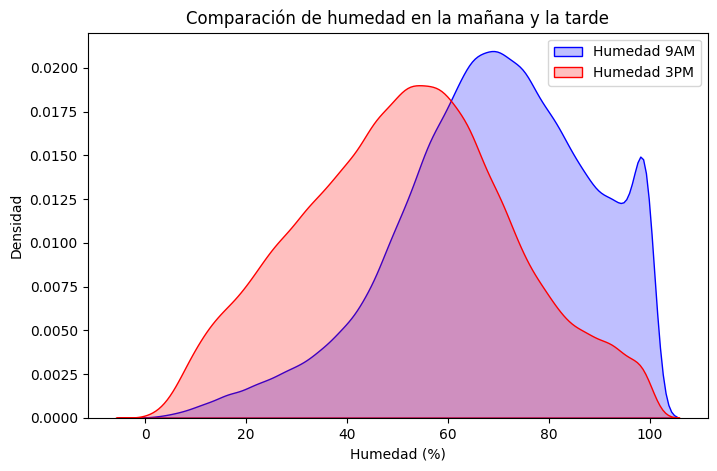

In [10]:
# Comparación de humedad en la mañana y en la tarde
plt.figure(figsize=(8, 5))
sns.kdeplot(df["Humidity9am"].dropna(), label="Humedad 9AM", fill=True, color="blue")
sns.kdeplot(df["Humidity3pm"].dropna(), label="Humedad 3PM", fill=True, color="red")
plt.xlabel("Humedad (%)")
plt.ylabel("Densidad")
plt.title("Comparación de humedad en la mañana y la tarde")
plt.legend()
plt.show()

Valor de correlación | Interpretación
- 1.0	Correlación positiva perfecta: si una variable sube, la otra también sube proporcionalmente.
- 0.7 a 0.9	Correlación fuerte: las variables están fuertemente relacionadas.
- 0.4 a 0.6	Correlación moderada: hay relación, pero no es tan fuerte.
- 0.1 a 0.3	Correlación débil: la relación es baja.
- 0.0	Sin correlación: las variables no tienen relación.
- -0.1 a -0.3	Correlación débil negativa: cuando una sube, la otra baja.
- -0.4 a -0.6	Correlación moderada negativa.
- -0.7 a -0.9	Correlación fuerte negativa.
- -1.0	Correlación negativa perfecta: si una sube, la otra baja proporcionalmente.

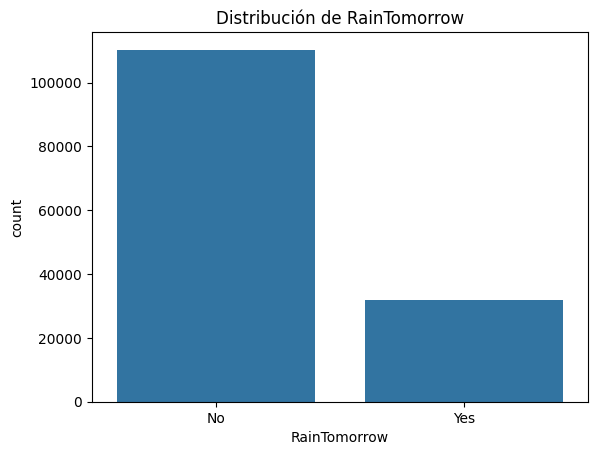

In [11]:
# Ver distribución de la variable objetivo 'RainTomorrow'
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribución de RainTomorrow')
plt.show()

Aquí visualizamos cómo se distribuye la variable objetivo (por ejemplo, si llovió o no al día siguiente). Esto es importante porque si la variable está desbalanceada (por ejemplo, muchos más valores de "No lluvia"), podría afectar el modelo.


## Paso 3: Preparación de los Datos (Data Preparation)

En esta fase, nos enfocamos en:
- Limpiar los datos
- Manejar los valores nulos
- Convertir tipos de datos si es necesario y transformar los datos a un formato que sea adecuado para el análisis o modelado posterior.
- Manejo de valores nulos: Dependiendo de la cantidad de valores faltantes, podemos decidir eliminar las filas/columnas con muchos valores nulos o imputar esos valores.

Eliminamos columnas que no aportan valor predictivo directo o que pueden causar sobreajuste (Location porque puede producir sesgo geográfico y sobreajuste) 
y data leakage (RISK_MM porque aporta directamente a la variable predictora).

In [12]:
df.drop(columns=["Location", "RISK_MM"], inplace=True)

De Date extraemos los meses y añadimos una columna que los categorice como estación
El mes y la estación pueden ser relevantes para agricultura (época seca/húmeda). Date por sí sola no es útil.

In [13]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

def obtener_estacion(mes):
    if mes in [12, 1, 2]:
        return "Verano"
    elif mes in [3, 4, 5]:
        return "Otoño"
    elif mes in [6, 7, 8]:
        return "Invierno"
    else:
        return "Primavera"

df["Estacion"] = df["Month"].apply(obtener_estacion)
df.drop(columns=["Date"], inplace=True)

Para los valores nulos imputamos columnas numéricas en base a la mediana o la moda.
Decidimos no eliminar Cloud, Sunshine y Evaporation ya que a pesar de que tienen la mayor cantidad de nulos pueden influir en la predicción del clima.

In [14]:
# Revisar columnas con valores nulos
nulos = df.isnull().sum()
print("Valores nulos por columna antes de la limpieza:")
print(nulos[nulos > 0])

# Eliminar columnas con más del 50% de valores nulos
threshold = 0.5 * len(df)
columnas_a_eliminar = nulos[nulos > threshold].index
print("Columnas eliminadas por tener más del 50% de valores nulos:", columnas_a_eliminar.tolist())
df.drop(columns=columnas_a_eliminar, inplace=True)

# Imputar valores nulos restantes
# Imputamos las columnas numéricas con la mediana
cols_median = [
    "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
    "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm",
    "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
    "Temp9am", "Temp3pm"
]

for col in cols_median:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Imputamos las categóricas con la moda
cols_mode = [
    "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "Cloud9am", "Cloud3pm"
]

for col in cols_mode:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Verificar nuevamente los valores nulos
nulos_despues = df.isnull().sum()
print("Valores nulos por columna después de la limpieza:")
print(nulos_despues[nulos_despues > 0])

In [15]:
# Verificamos que no queden nulos
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Estacion         0
dtype: int64

Los outliers serán limitados para evitar que distorsionen cuálquier posible modelo.

In [16]:
# Limitamos valores extremos para evitar que distorsionen el modelo
def limitar_outliers(col, upper_percentile=0.99):
    upper_limit = df[col].quantile(upper_percentile)
    df[col] = df[col].clip(upper=upper_limit)

cols_outliers = [
    "Rainfall", "Evaporation", "Sunshine",
    "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm",
    "Humidity9am", "Humidity3pm",
    "Pressure9am", "Pressure3pm",
    "Temp9am", "Temp3pm"
]

for col in cols_outliers:
    limitar_outliers(col)


Verificar que todas las variables sean numéricas

In [17]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Month              int32
Estacion          object
dtype: object

La mayoría está mal codificada en float y object por lo que no nos sirve para el entrenamiento así que debemos cambiarlas.

In [18]:
# Variables categóricas que se transforman a binarias
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

# One-hot encoding para variables categóricas con muchas clases
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Estacion']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verificar nuevamente
df.dtypes

MinTemp               float64
MaxTemp               float64
Rainfall              float64
Evaporation           float64
Sunshine              float64
                       ...   
WindDir3pm_WNW           bool
WindDir3pm_WSW           bool
Estacion_Otoño           bool
Estacion_Primavera       bool
Estacion_Verano          bool
Length: 67, dtype: object

## Paso 4: Modelado de datos

Con el dataset explorado, limpiado y estandarizado decidimos probar el modelado de datos para evaluar cuál tiene mejor desempeño.
Evaluamos los siguientes modelos:

- Regresión Logística porque es más fácil de interpretar y rápido
- Random Forest porque es robusto, maneja no linealidades y outliers
- XGBoost porque es muy preciso y popular
- KNN porque es simple, pero sensible a escala

Evaluando modelos:   0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo: Regresión Logística
Accuracy: 0.8435950631175498
Precision, Recall, F1-Score:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22064
           1       0.72      0.49      0.58      6375

    accuracy                           0.84     28439
   macro avg       0.79      0.72      0.74     28439
weighted avg       0.83      0.84      0.83     28439

Matriz de Confusión:
[[20886  1178]
 [ 3270  3105]]


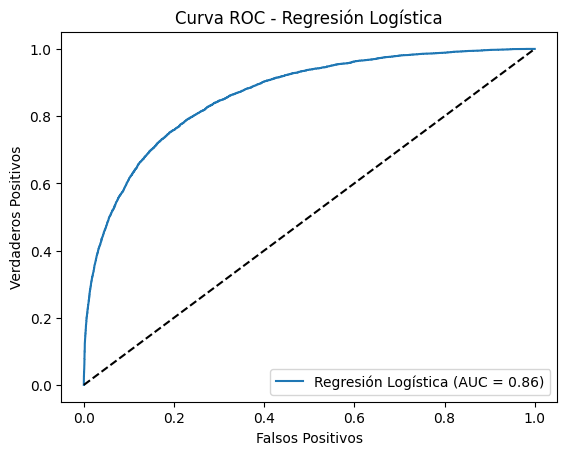

Evaluando modelos:  17%|█▋        | 1/6 [00:20<01:43, 20.74s/it]

--------------------------------------------------
Modelo: Random Forest
Accuracy: 0.8559724322233553
Precision, Recall, F1-Score:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22064
           1       0.78      0.50      0.61      6375

    accuracy                           0.86     28439
   macro avg       0.82      0.73      0.76     28439
weighted avg       0.85      0.86      0.84     28439

Matriz de Confusión:
[[21141   923]
 [ 3173  3202]]


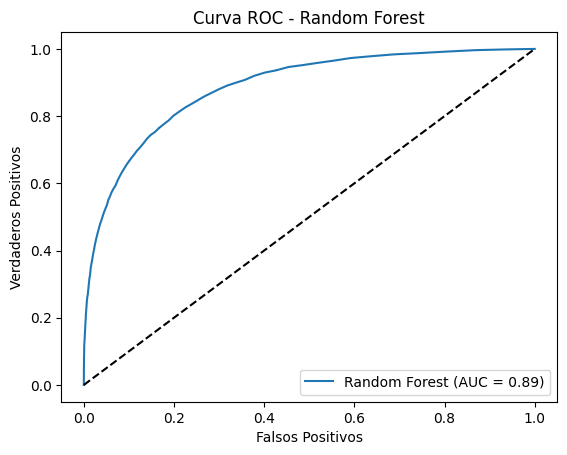

Evaluando modelos:  33%|███▎      | 2/6 [00:45<01:31, 22.90s/it]

--------------------------------------------------
Modelo: XGBoost
Accuracy: 0.8550581947325855
Precision, Recall, F1-Score:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22064
           1       0.74      0.55      0.63      6375

    accuracy                           0.86     28439
   macro avg       0.81      0.74      0.77     28439
weighted avg       0.85      0.86      0.85     28439

Matriz de Confusión:
[[20841  1223]
 [ 2899  3476]]


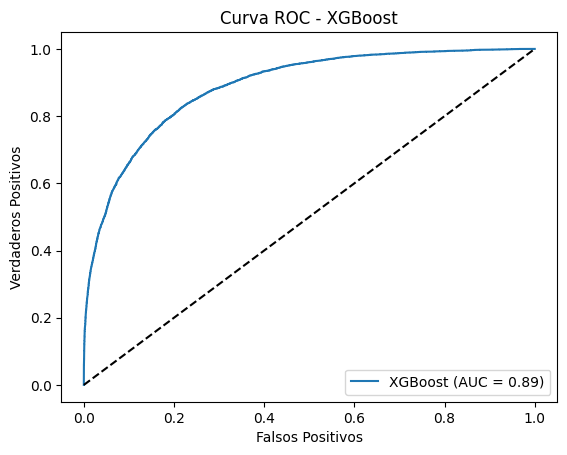

Evaluando modelos:  50%|█████     | 3/6 [00:46<00:38, 12.87s/it]

--------------------------------------------------
Modelo: KNN
Accuracy: 0.8348043180139949
Precision, Recall, F1-Score:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     22064
           1       0.68      0.50      0.58      6375

    accuracy                           0.83     28439
   macro avg       0.77      0.72      0.74     28439
weighted avg       0.82      0.83      0.83     28439

Matriz de Confusión:
[[20524  1540]
 [ 3158  3217]]


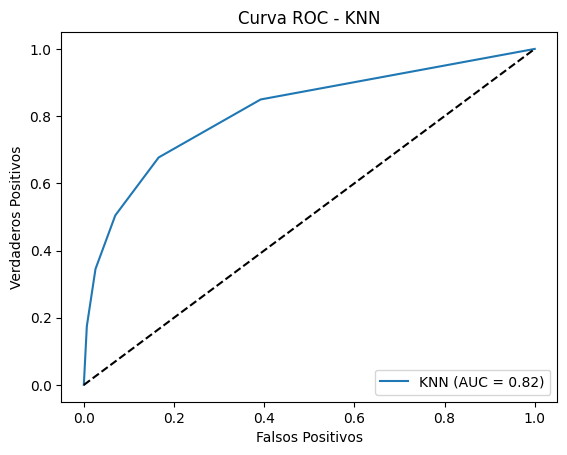

Evaluando modelos:  67%|██████▋   | 4/6 [00:55<00:22, 11.33s/it]

--------------------------------------------------


In [ ]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt

# Separar variables predictoras y objetivo
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"] 

# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelos a evaluar
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# Evaluación de modelos con una barra de progreso
for nombre, modelo in tqdm(modelos.items(), desc="Evaluando modelos"):
    # Entrenamiento del modelo
    modelo.fit(X_train, y_train)

    # Predicción
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None

    # Evaluación
    print(f"Modelo: {nombre}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision, Recall, F1-Score:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

    # Curva ROC y AUC
    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {auc:.2f})")
        plt.plot([0, 1], [0, 1], "k--")
        plt.xlabel("Falsos Positivos")
        plt.ylabel("Verdaderos Positivos")
        plt.title(f"Curva ROC - {nombre}")
        plt.legend(loc="lower right")
        plt.show()

    print("-" * 50)

## Paso 5: Evaluación de los modelos



Para evaluar los modelos, se medirán las siguientes métricas y técnicas:

Accuracy: Proporción de predicciones correctas.
Precision, Recall y F1-Score: Especialmente útiles si los datos están desbalanceados.
Matriz de Confusión: Para analizar los errores de clasificación.
Curva ROC y AUC: Para evaluar el rendimiento del modelo en términos de sensibilidad y especificidad.
Cross-Validation: Para evaluar la estabilidad del modelo.